In [1]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
plt.style.use('classic')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [2]:
ne = np.load("C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\ti255\\ne_ti255_mid.npy")

In [3]:
ne[np.isnan(ne)] = 0
ne_tor = ne.mean(axis = 2)
ne_tt = ne_tor.mean(axis = 0)
dne = np.ones((ne.shape[0],ne.shape[1],ne.shape[2],ne.shape[3]))
for time in range(0,ne.shape[0]):
    for plane in range(0,ne.shape[2]):
        dne[time,:,plane,:] = ne[time,:,plane,:] - ne_tt[:,:]
dne.shape

(690, 100, 32, 100)

In [4]:
dnrms = np.ones((ne.shape[0],ne.shape[1],ne.shape[2],ne.shape[3]))
for time in range(0,ne.shape[0]):
    for plane in range(0,ne.shape[2]):
        dnrms[time,:,plane,:] = np.sqrt(np.power(ne[time,:,plane,:] - ne_tor[time,:,:],2))
dnrms.shape

(690, 100, 32, 100)

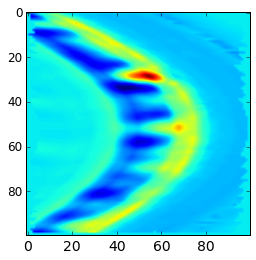

In [5]:
plt.imshow(dne[680,0:100,0,0:100])
plt.show()

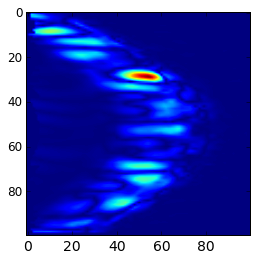

In [6]:
plt.imshow(dnrms[680,0:100,0,0:100])
plt.show()

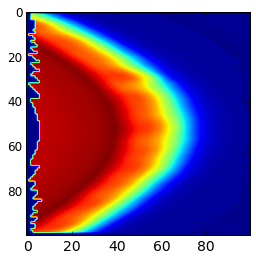

In [7]:
plt.imshow(ne[680,:,0,0:100])
plt.show()

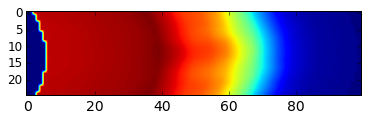

In [8]:
plt.imshow(ne[680,40:65,0,0:100])
plt.show()

In [9]:
dt = 2.3e-7
T = [x*dt for x in range(200)]
N_t = len(T)
T_t = dt*N_t
df_t = 1/T_t
dw_t = 2*np.pi/T_t
freq_t = np.fft.fftfreq(len(T))

In [10]:
tm = [x for x in range(ne.shape[0])]
gamma = 0.040
y = [gamma*tip +35.0 for tip in tm]
plt.plot(tm[:200],np.log(dnerms[:200,50,5,60]))
plt.plot(tm[0:250],y[0:250],'r*')
plt.show()

NameError: name 'dnerms' is not defined

In [11]:
growth = gamma/dt
print("growth rate (1/s) = ", growth)

growth rate (1/s) =  173913.04347826086


In [12]:
dR = (2.27-2.19)/100
dZ = (0.16+0.25)/100
R = [2.19+60*dR+ip*dR for ip in range(10)]
Z = [-0.16+40*dZ+ip*dZ for ip in range(25)]
rho_i=2.0e-3

In [13]:
N_z = len(Z)
dt_z = dZ
T_z = dt_z*N_z
df_z = 1/T_z
dw_z = 2*np.pi/T_z
freq_z = np.fft.fftfreq(len(Z))

kz [0.         0.12259874 0.24519748 0.36779621 0.49039495 0.61299369
 0.73559243 0.85819116 0.9807899  1.10338864 1.22598738 1.34858611
 1.47118485 1.47118485 1.34858611 1.22598738 1.10338864 0.9807899
 0.85819116 0.73559243 0.61299369 0.49039495 0.36779621 0.24519748
 0.12259874]


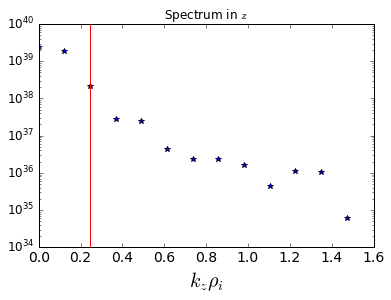

In [14]:
#fou_z = np.fft.fft(pot_tt[0:80,85]-np.mean(pot_tt[0:80,85]))
#fou_z = np.fft.fft(pot_tor[190,20:40,85]-np.mean(pot_tt[20:40,85]))
fou_z = np.fft.fft(ne_tor[680,40:65,65]-np.mean(ne_tt[40:65,65]))
plt.semilogy(abs(freq_z*N_z*dw_z)*rho_i,abs(fou_z)**2,'*')
print('kz',abs(freq_z*N_z*dw_z)*rho_i)
plt.axvline(x=0.246,color='r')
#plt.ylim(1.0e2,1.0e6)
plt.title(r'Spectrum in $z$')
plt.xlabel(r'$k_z \rho_i$')
plt.show()

In [93]:
N_r = len(R)
dt_r = dR
T_r = dt_r*N_r
df_r = 1/T_r
dw_r = 2*np.pi/T_r
freq_r = np.fft.fftfreq(len(R))

kr [0.         1.57079633 3.14159265 4.71238898 6.28318531 7.85398163
 6.28318531 4.71238898 3.14159265 1.57079633]


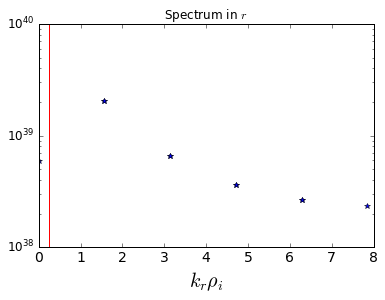

In [95]:
fou_r = np.fft.fft(ne_tor[680,50,60:70]-np.mean(ne_tt[50,60:70]))
plt.semilogy(abs(freq_r*N_r*dw_r)*rho_i,abs(fou_r)**2,'*')
print('kr',abs(freq_r*N_r*dw_r)*rho_i)
plt.axvline(x=0.246,color='r')
#plt.ylim(1.0e2,1.0e6)
plt.title(r'Spectrum in $r$')
plt.xlabel(r'$k_r \rho_i$')
plt.show()

In [15]:
dt = 2.3e-7
T = [x*dt for x in range(200)]
N_t = len(T)
T_t = dt*N_t
df_t = 1/T_t
dw_t = 2*np.pi/T_t
freq_t = np.fft.fftfreq(len(T))

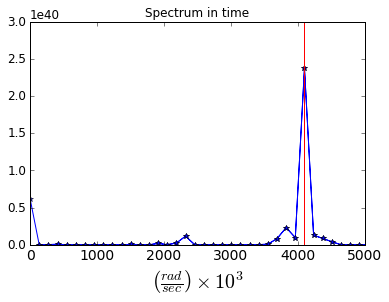

In [16]:
#fou_t = np.fft.fft(dnrms[490:,50,0,60])
fou_t = np.fft.fft(ne_tor[490:,50,60]-np.mean(ne_tt[50,60]))
plt.plot(abs(freq_t*N_t*dw_t)/1000,abs(fou_t)**2,'*-')
plt.xlabel(r'$\left(\frac{rad}{sec}\right)\times 10^3$')
plt.title(r'Spectrum in time')
plt.ylim(1.0e35,3.0e40)
plt.xlim(0,5000)
#plt.xlim(72000,78000)
plt.axvline(x=4090,color='r')#651 kHz
#plt.axvline(x=4020,color='b')#640 kHz
plt.show()

In [17]:
X = abs(freq_z*N_z*dw_z)*rho_i
Y = abs(freq_t*N_t*dw_t)
XX,YY = np.meshgrid(X,Y)

In [18]:
fou_z = np.fft.fft2(ne_tor[:,50:70,60]-np.mean(ne_tt[50:70,60]),axes=(-2,-1))
F2 = np.fft.fftshift(fou_z**2)
F = abs(fou_z**2)
F2 = abs(F2)

TypeError: Dimensions of C (20, 690) are incompatible with X (25) and/or Y (200); see help(pcolor)

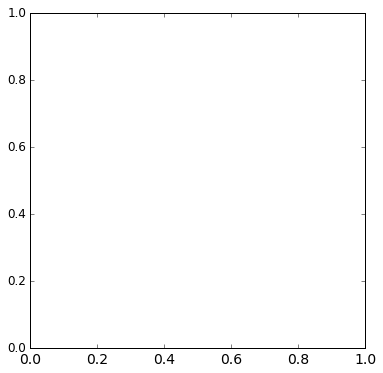

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
pos=ax.pcolor(XX[:,:],YY[:,:],abs(F.T)/1.0e21,cmap='viridis_r',vmax=0.2)
#ax.set_aspect(1000)
plt.xlim(0,1.0)
plt.ylim(0,6000)
plt.ylabel(r'$\left(\frac{rad}{sec}\right)\times 10^3$')
plt.xlabel(r'$k_z \rho_i$')
fig.colorbar(pos)
plt.show()